**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [114]:
## libraries
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import os.path
import sys
import gc

# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# release memory for large arrays (dictionary)
def release_array(dd):
    del dd 
    gc.collect()
    dd = None

In [115]:
# Reduce DataFrame size
# This part of the code is not my, I get from this webpage: 
# https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [116]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [118]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-20 18:16:10.685137


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [119]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# reduce memory usage
df_reviews = reduce_mem_usage(df_reviews)
# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Memory usage of dataframe is 43.37 MB
Memory usage after optimization is: 43.37 MB
Decreased by 0.0%
Numero de linhas: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [120]:
######## parte do dataset
df_reviews_copy = df_reviews.copy()
df_reviews_sample = df_reviews_copy.sample(15000) # FIXME remover no final

# release memory RAM - dataframe
release_memory(df_reviews_copy)
release_memory(df_reviews)
df_reviews = df_reviews_sample
release_memory(df_reviews_sample)

memory RAM released.
memory RAM released.
memory RAM released.


In [121]:
# Lista de valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   3
Text                      0
dtype: int64

In [122]:
# dataset - tamanho
df_reviews.shape

(15000, 10)

In [123]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [124]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [125]:
df_reviews.shape

(14997, 10)

In [126]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [127]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
212134,212135,B000CNB4LE,A3R72RAX86YAWJ,Margot,1,4,5,1275004800,ZICO NATURAL IN THE BOTTLE ROCKS!,I love the new ZICO in the bottle!! The natura...
558734,558735,B0042ROB20,A1SMUN2EB0AM9P,Serious music junkie,2,2,1,1337126400,Very disappointing products,These were very poor quality truffles with abs...
418850,418851,B0015DQG1S,A1WA83ZCKW7QQ4,Daniel Turano,1,1,5,1290988800,The original is still the best!,It is getting hard to find Life Savers in my f...


In [128]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    9533
4    2157
1    1377
2     807
Name: Score, dtype: int64

In [129]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [130]:
df_reviews["negative"].value_counts()

0    11690
1     2184
Name: negative, dtype: int64

In [131]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"I love the new ZICO in the bottle!! The natural is my fave!!  It is a bit nuttier than the Tetra ZICO.  The bottle makes it so much easier to take to the gym, on my bike or throw in my backpack. Plus I love that I can reseal it and don't have to drink it all at once (although once it is opened, I have a hard time NOT finishing it!!).  My kids love the new flavors since they are sweeter and I love that they drink it since it is so much healthier for them than most other beverages on the market.  Thank you ZICO!!These were very poor quality truffles with absolutely no true truffle taste or aroma.  Their customer service was horrible.  Purchase at your own risk. . .It is getting hard to find Life Savers in my food store so buying the box of 20 is a great alternative.  The box arrived in good condition with no signs of crushing.These treats are so good I forgot they were for my dog!!! Really good with a nice tall glass of cold milk!!If you like a Mild Hazelnut coffee at a reasonable price

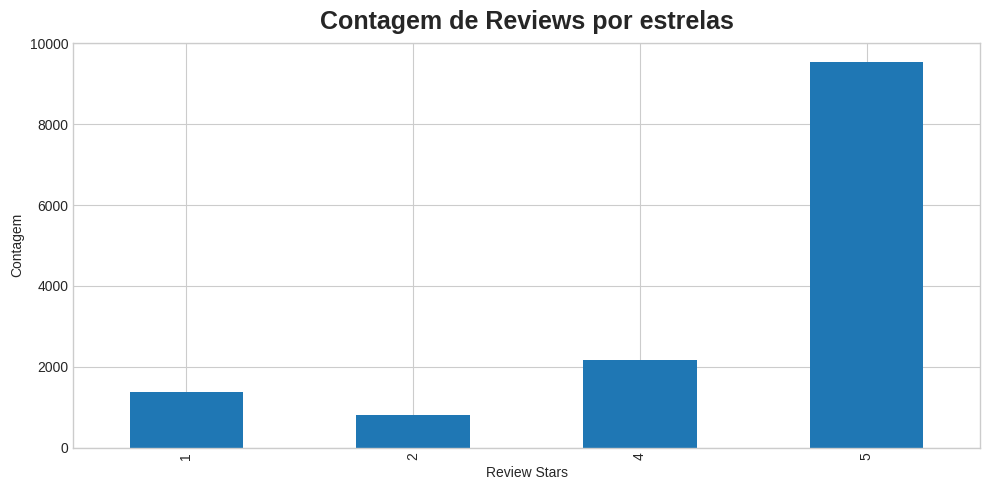

In [132]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
ax.set_ylabel('Contagem')
plt.show()

In [133]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [134]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [135]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 6351,
 'like': 5921,
 'good': 4457,
 'one': 4130,
 'great': 3864,
 'taste': 3813,
 'coffee': 3805,
 'product': 3167,
 'flavor': 3141,
 'food': 3117}

In [136]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

### Nuvem de Palavras

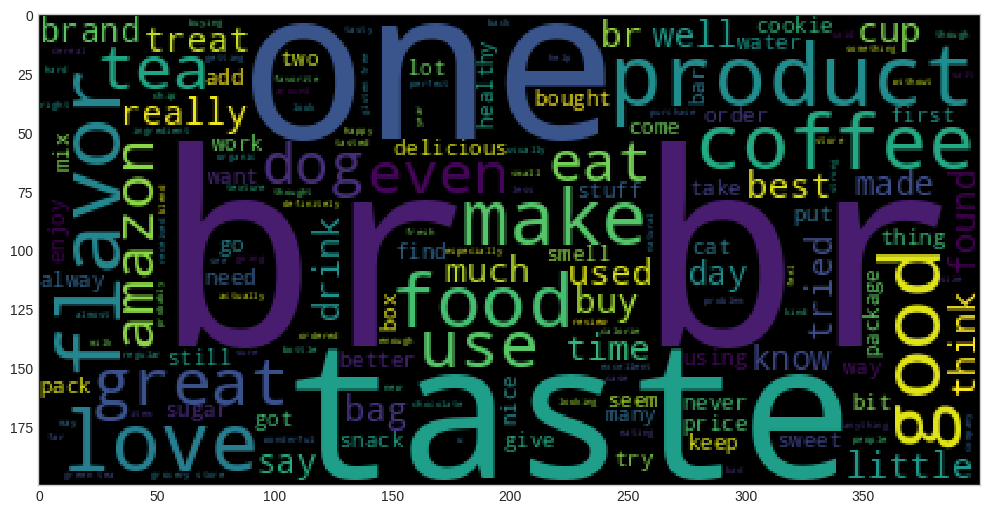

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.grid(False)
plt.tight_layout()

In [138]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 6351,
 'like': 5921,
 'good': 4457,
 'one': 4130,
 'great': 3864,
 'taste': 3813,
 'coffee': 3805,
 'product': 3167,
 'flavor': 3141,
 'food': 3117}

In [139]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [140]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

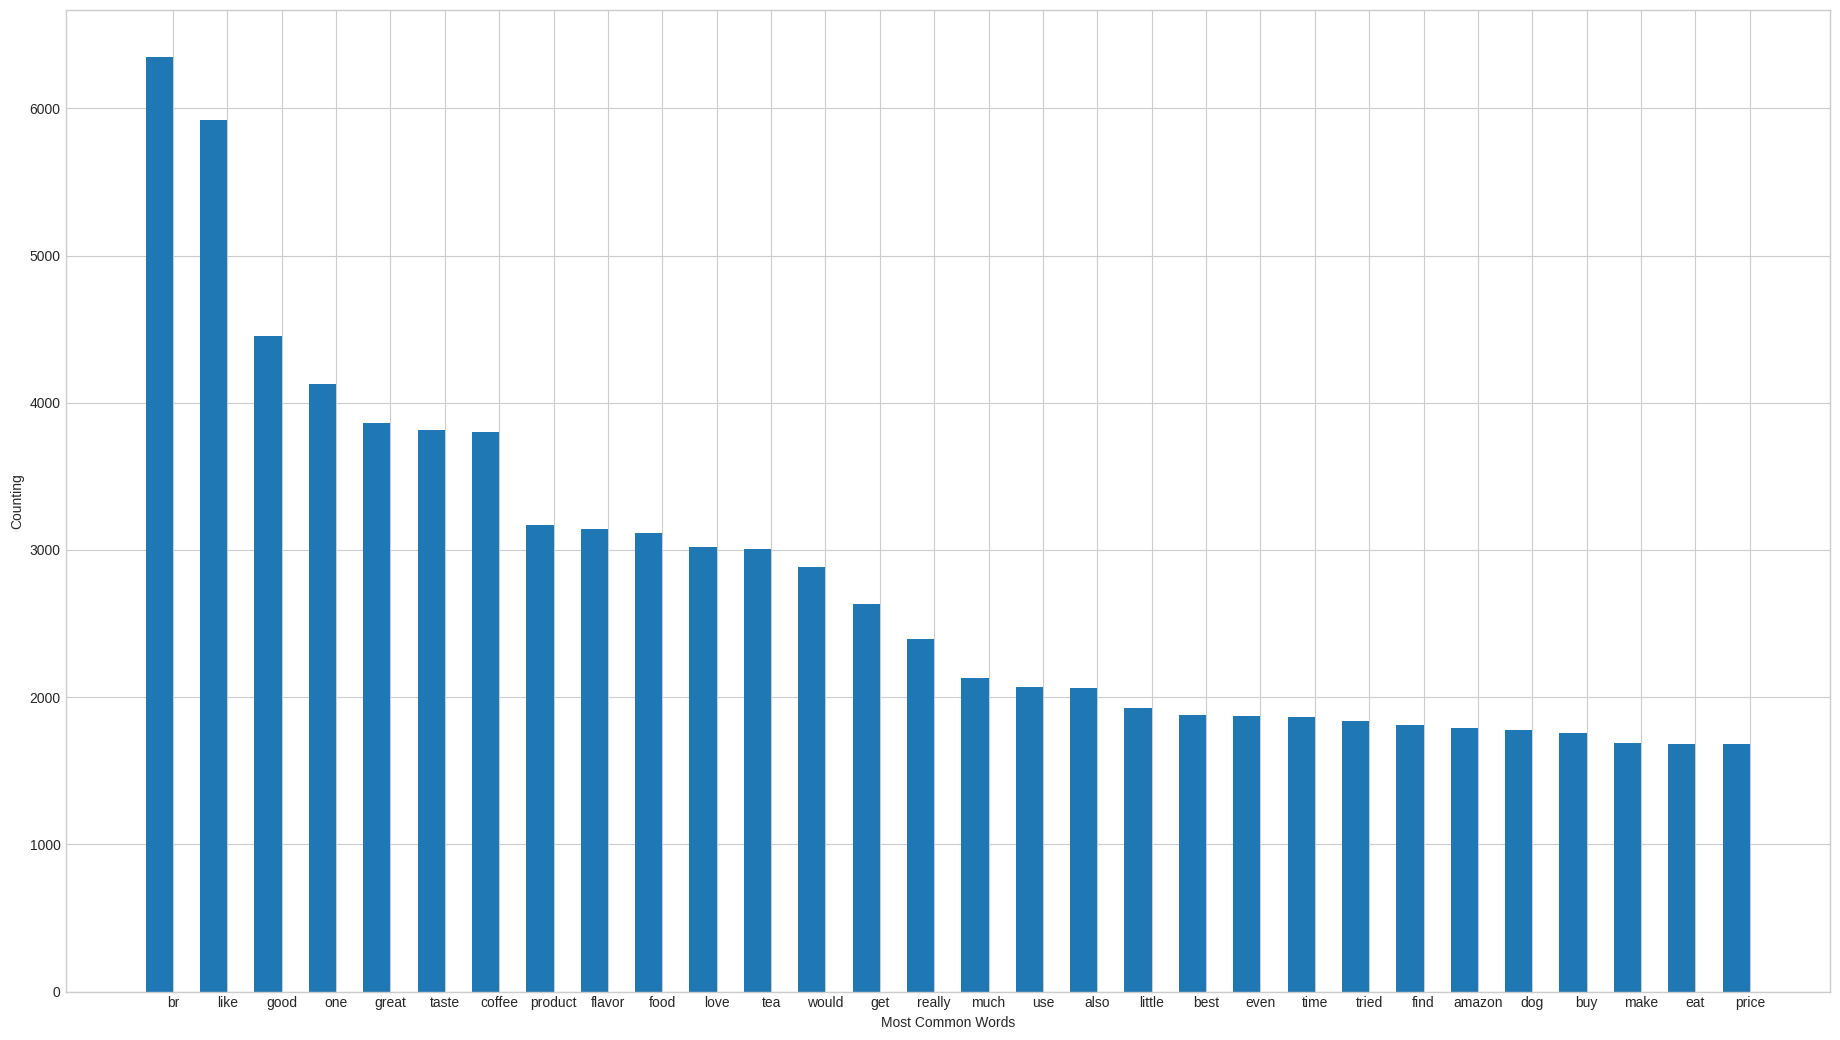

In [141]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [142]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [143]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [144]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [145]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [146]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [147]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [148]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [149]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13874 entries, 212134 to 76337
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      13874 non-null  int64 
 1   ProductId               13874 non-null  object
 2   UserId                  13874 non-null  object
 3   ProfileName             13874 non-null  object
 4   HelpfulnessNumerator    13874 non-null  int64 
 5   HelpfulnessDenominator  13874 non-null  int64 
 6   Score                   13874 non-null  int64 
 7   Time                    13874 non-null  int64 
 8   Summary                 13874 non-null  object
 9   Text                    13874 non-null  object
 10  negative                13874 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


In [150]:
df_reviews['Text']

212134    love new zico bottl natur fave bit nuttier tet...
558734    poor qualiti truffl absolut true truffl tast a...
418850    get hard find life saver food store buy box 20...
251766    treat good forgot dog realli good nice tall gl...
245274    like mild hazelnut coffe reason price one like...
                                ...                        
195791    least strong bitter coffe find k cup like stro...
485533    far ingredi concern chip seem healthier regula...
401205    belov english springer spaniel lloyd suffer se...
486380    healthi treat dog absolut goe crazi terrif val...
76337     recent drop coffe tea bought moroccan mint com...
Name: Text, Length: 13874, dtype: object

In [151]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [152]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

212134    love new zico bottl natur fave bit nuttier tet...
558734    poor qualiti truffl absolut true truffl tast a...
418850    get hard find life saver food store buy box 20...
251766    treat good forgot dog realli good nice tall gl...
245274    like mild hazelnut coffe reason price one like...
                                ...                        
195791    least strong bitter coffe find k cup like stro...
485533    far ingredi concern chip seem healthier regula...
401205    belov english springer spaniel lloyd suffer se...
486380    healthi treat dog absolut goe crazi terrif val...
76337     recent drop coffe tea bought moroccan mint com...
Name: Text, Length: 13874, dtype: object

In [153]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [154]:
# Build the model
model_tf = Sequential()
model_tf.add(Embedding(max_features, 128))
model_tf.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_tf.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
#Salvando modelo 
pickle.dump(model_tf,open('model_tensorflow.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-20 18:17:46         2218
metadata.json                                  2023-05-20 18:17:46           64
variables.h5                                   2023-05-20 18:17:46      3103176


In [156]:
X = df_reviews['Text']
y = df_reviews['negative']

In [157]:
# release memory RAM
release_memory(df_reviews)

memory RAM released.


In [158]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
#word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (23380, 17013)
y.shape =  (23380,)


In [159]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [160]:
# release memory - array
release_array(X)
release_array(y)

In [161]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [162]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.62      0.77      9319
    Negativo       0.73      1.00      0.84      9385

    accuracy                           0.81     18704
   macro avg       0.86      0.81      0.81     18704
weighted avg       0.86      0.81      0.81     18704

ROC Score: 0.8117287262581823
Accuracy Score: 0.8123930710008554
Average Precision Score: 0.7278579184116644
f1 Score: 0.8424974190942144
Confusion matrix, without normalization
[[5810 3509]
 [   0 9385]]


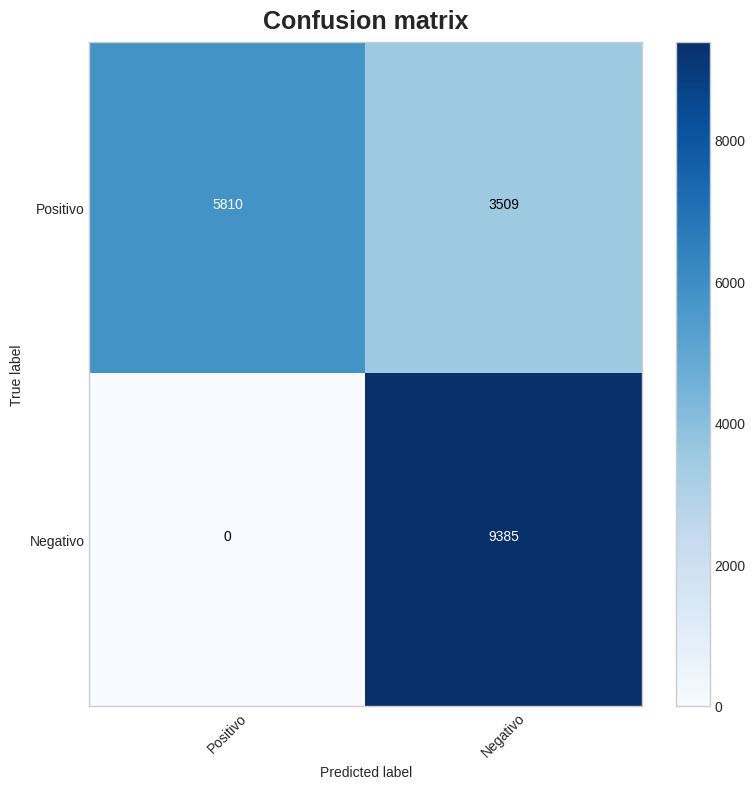

In [163]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

Classification Report
              precision    recall  f1-score   support

    Positivo       0.87      0.73      0.79      9319
    Negativo       0.77      0.90      0.83      9385

    accuracy                           0.81     18704
   macro avg       0.82      0.81      0.81     18704
weighted avg       0.82      0.81      0.81     18704

ROC Score: 0.8109181161441532
Accuracy Score: 0.8112168520102652
Average Precision Score: 0.7394464610340771
f1 Score: 0.8264097143699916
Confusion matrix, without normalization
[[6768 2551]
 [ 980 8405]]


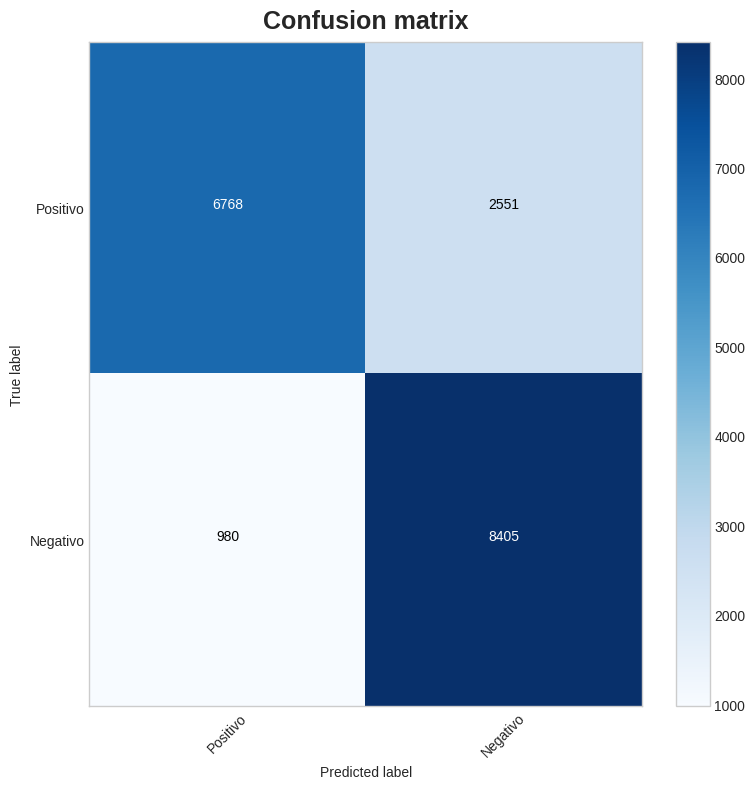

In [164]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)

roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [165]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

Classification Report
              precision    recall  f1-score   support

    Positivo       0.89      0.82      0.86      2371
    Negativo       0.83      0.90      0.86      2305

    accuracy                           0.86      4676
   macro avg       0.86      0.86      0.86      4676
weighted avg       0.86      0.86      0.86      4676

ROC Score: 0.8608693623511134
Accuracy Score: 0.8603507271171942
Average Precision Score: 0.7975192098988312
f1 Score: 0.8637027760384053
Confusion matrix, without normalization
[[1954  417]
 [ 236 2069]]


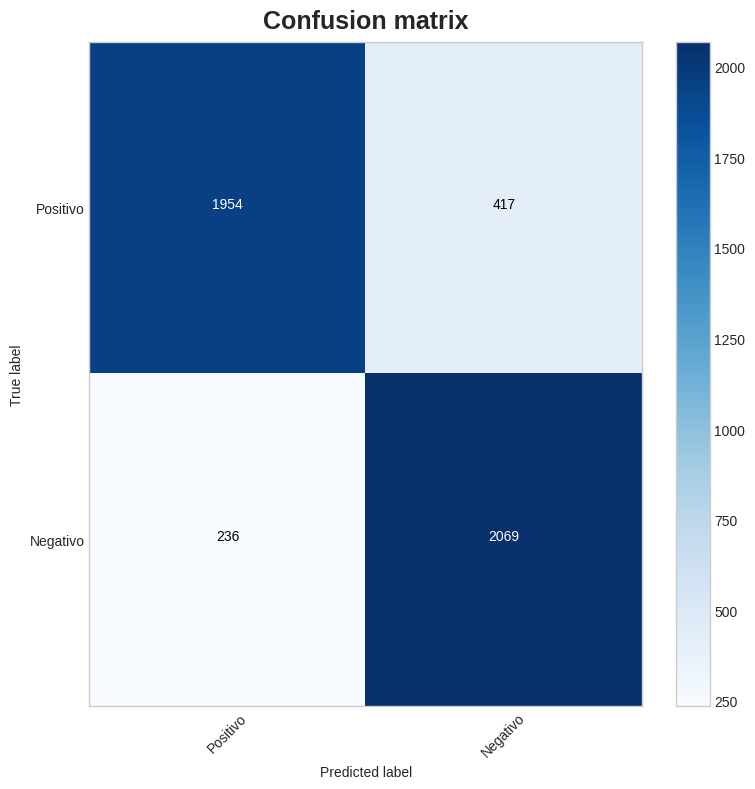

In [166]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [167]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [168]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

In [169]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

2023-05-20 18:33:50.025494: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2545689216 exceeds 10% of free system memory.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.9656

2023-05-20 18:34:17.932934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 636422304 exceeds 10% of free system memory.


74/74 [==============================] - 27s 294ms/step - loss: 0.9656 - val_loss: 0.4877
Epoch 2/10
74/74 [==============================] - 21s 287ms/step - loss: 0.4260 - val_loss: 0.4509
Epoch 3/10
74/74 [==============================] - 21s 275ms/step - loss: 0.2324 - val_loss: 0.4425
Epoch 4/10
74/74 [==============================] - 20s 273ms/step - loss: 0.1533 - val_loss: 0.4596
Epoch 5/10
74/74 [==============================] - 21s 283ms/step - loss: 0.1075 - val_loss: 0.2971
Epoch 6/10
74/74 [==============================] - 20s 274ms/step - loss: 0.0827 - val_loss: 0.1739
Epoch 7/10
74/74 [==============================] - 20s 275ms/step - loss: 0.0755 - val_loss: 0.1121
Epoch 8/10
74/74 [==============================] - 21s 277ms/step - loss: 0.0714 - val_loss: 0.0963
Epoch 9/10
74/74 [==============================] - 21s 285ms/step - loss: 0.0672 - val_loss: 0.1271
Epoch 10/10
74/74 [==============================] - 21s 280ms/step - loss: 0.0632 - val_loss: 0.0878


Text(0.5, 1.0, 'The learning curves')

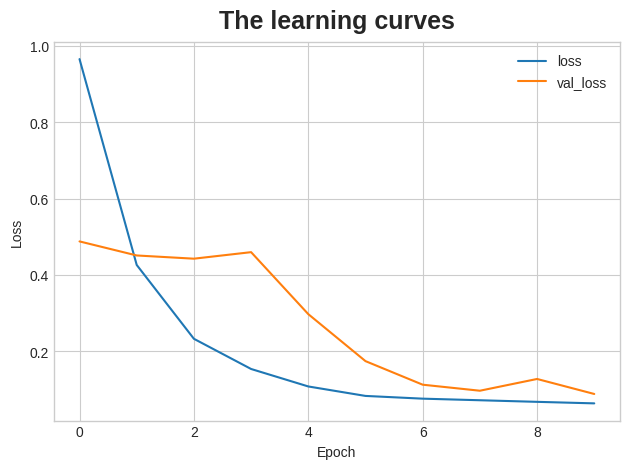

In [170]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

2023-05-20 18:37:26.875639: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 636422304 exceeds 10% of free system memory.


147/147 [==============================] - 2s 14ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.92      0.96      0.94      2371
    Negativo       0.95      0.91      0.93      2305

    accuracy                           0.94      4676
   macro avg       0.94      0.93      0.94      4676
weighted avg       0.94      0.94      0.94      4676

ROC Score: 0.9348892208912647
Accuracy Score: 0.9352010265183918
Average Precision Score: 0.9135781815033246
f1 Score: 0.932830857902904
Confusion matrix, without normalization
[[2269  102]
 [ 201 2104]]


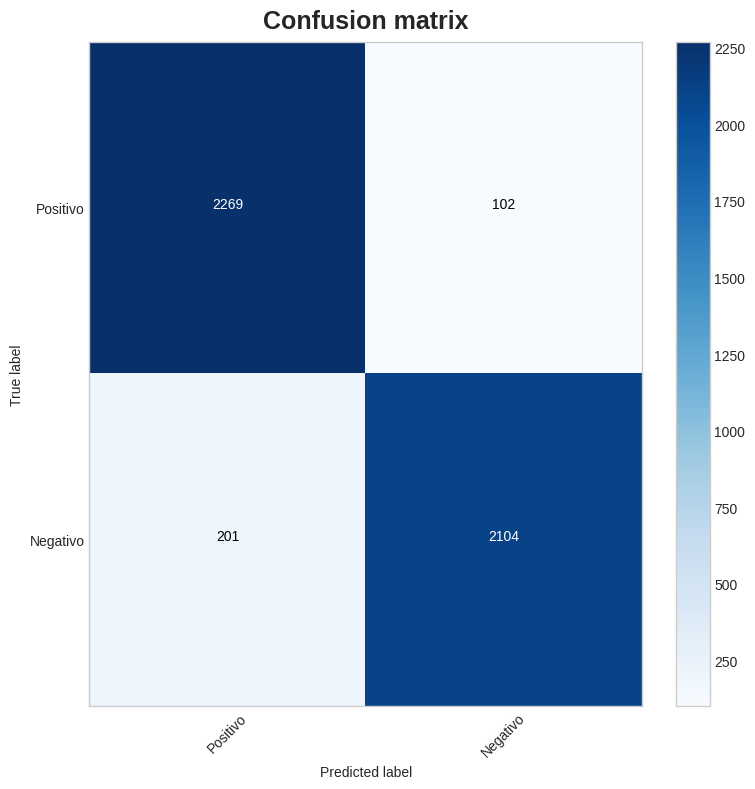

In [171]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [172]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [173]:
clf_gnb_roc = clf_gnb.predict(x_validation)
model_roc = model.predict(x_validation)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

  8/147 [>.............................] - ETA: 2s

2023-05-20 18:37:37.615718: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 636422304 exceeds 10% of free system memory.


147/147 [==============================] - 2s 14ms/step


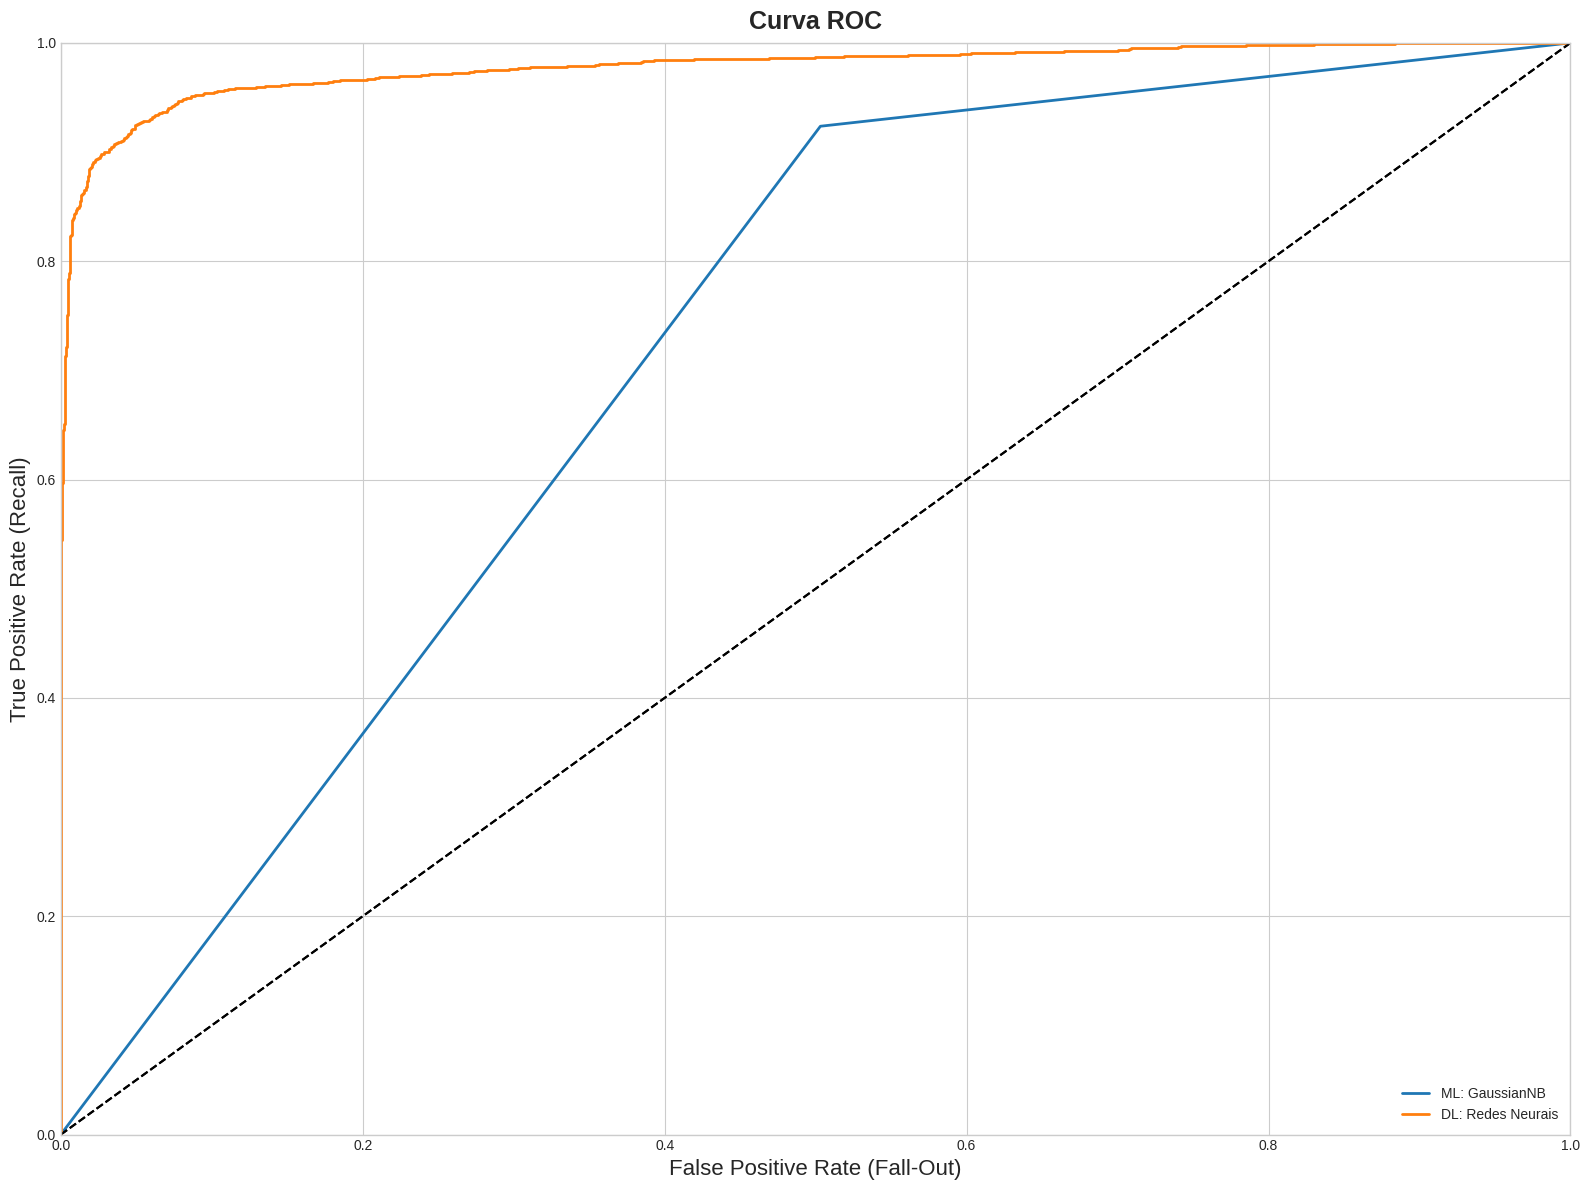

In [174]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='ML: GaussianNB')
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Redes Neurais')
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.legend(loc="lower right")
plt.title('Curva ROC', fontweight="bold")
plt.show()

In [175]:
#### File end HERE

# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 21.506 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
